In [122]:
import requests
from io import StringIO
import pandas as pd
import numpy as np
import datetime
import time
import matplotlib.pyplot as plt
date = datetime.datetime.now()

def transfer_date(datestr):
    datestr = str(datestr).split(' ')[0].replace('-','')
    return datestr
def crawler(datestr):
    r = requests.post('https://www.twse.com.tw/exchangeReport/MI_INDEX?response=csv&date='+datestr+'&type=ALLBUT0999')
    df = pd.read_csv(StringIO(r.text.replace('=','')), 
            header=["證券代號" in l for l in r.text.split("\n")].index(True)-1)
    df = df.set_index('證券代號')
    return(df)

dict_stock = {}
datespan = 200
date_index = 0
# print(transfer_date(date-datetime.timedelta(days=date_index)))
while len(dict_stock) < datespan:
    time.sleep(5)
    now_date = transfer_date(date-datetime.timedelta(days=date_index))
    try:
        dict_stock.update({now_date
            :crawler(now_date)})
        # date_index+=1
        # print('sucessfull at'+' '+str(transfer_date(now_date)))
    except:
        print('Fails at'+' '+str(transfer_date(now_date)))
    date_index+=1

close = pd.DataFrame({k:d['收盤價'].apply(pd.to_numeric,errors='coerce') for k,d in dict_stock.items()}).transpose()
close.index = pd.to_datetime(close.index)
close = close.sort_index()

Fails at 20191010
Fails at 20191006
Fails at 20191005
Fails at 20190930
Fails at 20190929
Fails at 20190928
Fails at 20190922
Fails at 20190921
Fails at 20190915
Fails at 20190914
Fails at 20190913
Fails at 20190908
Fails at 20190907
Fails at 20190901
Fails at 20190831
Fails at 20190825
Fails at 20190824
Fails at 20190818
Fails at 20190817
Fails at 20190811
Fails at 20190810
Fails at 20190809
Fails at 20190804
Fails at 20190803
Fails at 20190728
Fails at 20190727
Fails at 20190721
Fails at 20190720
Fails at 20190714
Fails at 20190713
Fails at 20190707
Fails at 20190706
Fails at 20190630
Fails at 20190629
Fails at 20190623
Fails at 20190622
Fails at 20190616
Fails at 20190615
Fails at 20190609
Fails at 20190608
Fails at 20190607
Fails at 20190602
Fails at 20190601
Fails at 20190526
Fails at 20190525
Fails at 20190519
Fails at 20190518
Fails at 20190512
Fails at 20190511
Fails at 20190505
Fails at 20190504
Fails at 20190501
Fails at 20190428
Fails at 20190427
Fails at 20190421
Fails at 2

In [186]:
rsv = (close - close.rolling(9,min_periods=1).min())/(close.rolling(9,min_periods=1).max() - close.rolling(9,min_periods=1).min())*100
rsv = rsv.fillna(value = 0)

K = pd.DataFrame(np.zeros((len(rsv.index),len(rsv.columns))),columns = rsv.columns,index = rsv.index)
K.iloc[0] = rsv.iloc[0]
# K = K.shift()*(2/3)+rsv*(1/3)

for i in range(len(K.index)-1):
    for j in range(len(K.columns)):
        K.iloc[i+1,j] = K.iloc[i,j]*(2/3)+rsv.iloc[i+1,j]*(1/3)
K

,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,...,9940,9941,9941A,9942,9943,9944,9945,9946,9955,9958
2018-12-11,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2018-12-12,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,33.333333,0.000000,...,33.333333,33.333333,0.000000,0.000000,0.000000,33.333333,33.333333,33.333333,33.333333,33.333333
2018-12-13,55.555556,32.447171,55.555556,55.555556,55.555556,55.555556,55.555556,55.555556,55.555556,33.333333,...,40.740741,55.555556,0.000000,0.000000,0.000000,55.555556,55.555556,55.555556,55.555556,32.026144
2018-12-14,45.037037,27.561918,37.037037,45.608466,63.987392,55.218855,57.671958,43.029546,53.703704,23.848238,...,27.160494,70.370370,0.000000,18.518519,0.000000,70.370370,46.296296,70.370370,37.037037,21.350763
2018-12-17,54.024691,21.033099,41.037512,43.738977,71.027055,42.873176,59.082892,47.412956,68.738977,15.898826,...,18.106996,80.246914,33.333333,27.160494,0.000000,80.246914,36.419753,80.246914,24.691358,14.233842
2018-12-18,42.683128,14.226565,27.358341,35.349794,75.010945,28.582117,39.388595,34.979424,64.476778,10.599217,...,12.071331,86.831276,55.555556,32.921811,8.333333,78.497942,24.279835,86.831276,16.460905,9.489228
2018-12-19,51.122085,11.324867,35.048011,42.137958,74.829992,19.054745,36.444248,53.656695,75.524201,7.066145,...,12.214220,84.699111,70.370370,21.947874,13.888889,85.665295,16.186557,81.697041,25.259651,6.326152
2018-12-20,34.081390,7.549911,23.365341,29.996734,81.092335,12.703163,33.555425,45.883489,78.127245,4.710763,...,8.142814,75.306654,80.246914,14.631916,9.259259,79.332419,10.791038,59.226599,26.363577,4.217435
2018-12-21,26.720927,5.033274,15.576894,19.997823,65.409074,8.468776,32.555468,30.588993,58.434037,3.140509,...,9.132246,66.146465,78.497942,43.087944,6.172840,52.888279,14.416248,49.008209,27.099528,3.274586
2018-12-22,17.813951,6.372758,10.384596,13.331882,43.606050,5.645850,34.666609,20.392662,47.289358,2.093673,...,6.088164,51.875421,77.331962,60.097845,15.226337,57.481075,11.833054,43.783250,22.828256,29.960835


In [155]:
D = pd.DataFrame(np.zeros((len(rsv.index),len(rsv.columns))),columns = rsv.columns,index = rsv.index)

for i in range(len(K.index)-1):
    for j in range(len(K.columns)):
        D.iloc[i+1,j] = D.iloc[i,j]*(2/3)+K.iloc[i+1,j]*(1/3)

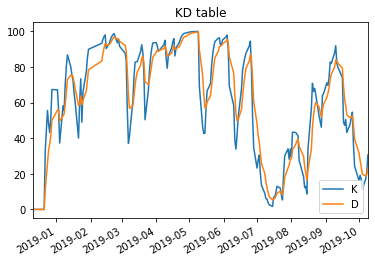

In [190]:
def draw(stock):
    K[stock].plot(label = 'K')
    D[stock].plot(label = 'D')
    plt.title('KD table')
    plt.legend(loc = 'lower right')
    plt.show()
draw('1712')

In [158]:
buy_sell = pd.DataFrame(np.zeros((len(rsv.index),len(rsv.columns))),columns = rsv.columns,index = rsv.index)
signal_buy = K>D
for i in range(len(signal_buy.index)-1):
    for j in range(len(signal_buy.columns)):
        if (signal_buy.iloc[i+1,j] ==True) and (signal_buy.iloc[i,j] ==False):
            buy_sell.iloc[i+1,j] = 1
        elif (signal_buy.iloc[i+1,j] ==False) and (signal_buy.iloc[i,j] ==True):
            buy_sell.iloc[i+1,j] = -1

In [191]:
start_capital = 500    #初始資產
stock_price_list = []  #目前擁有的股票，及當初買的成本
def count_capital(stock):   #開始計算表格
    stock_temp = close[str(stock)].copy()  #剩餘資產表
    result_capital = stock_temp.copy()     #總資產表
    result_capital.iloc[0] = start_capital
    stock_temp.iloc[0] = start_capital-close[str(stock)].iloc[0]
    stock_price_list.append(close[str(stock)].iloc[0])
    for i in range(len(close.index)):
        if close[str(stock)].iloc[i]>0:
            if i>0 and buy_sell[str(stock)].iloc[i]==-1:
                result_capital.iloc[i] = stock_temp.iloc[i-1]+close[str(stock)].iloc[i]*(len(stock_price_list))
                stock_temp.iloc[i] = result_capital.iloc[i]
                stock_price_list.clear()
            elif i>0 and buy_sell[str(stock)].iloc[i]==1:
                if stock_temp.iloc[i-1]-close[str(stock)].iloc[i]>0:
                    stock_temp.iloc[i]=stock_temp.iloc[i-1]-close[str(stock)].iloc[i]
                    stock_price_list.append(close[str(stock)].iloc[i])
                else:
                    pass
                result_capital.iloc[i] = stock_temp.iloc[i]+(close[str(stock)].iloc[i])*(len(stock_price_list))
            elif i>0:
                stock_temp.iloc[i] = stock_temp.iloc[i-1]
                if len(stock_price_list)>0:
                    result_capital.iloc[i] = stock_temp.iloc[i-1]+close[str(stock)].iloc[i]*(len(stock_price_list))
                else:
                    result_capital.iloc[i] = stock_temp.iloc[i-1]
            else:
                pass
        else:
            result_capital.iloc[i] = result_capital.iloc[i-1]
            stock_temp.iloc[i] = stock_temp.iloc[i-1]
    return pd.concat([stock_temp,result_capital],axis = 1)

def result(stock):
    All = pd.concat([close[stock],count_capital(stock),buy_sell[stock],K[stock],D[stock]],axis = 1)
    All.columns = ['收盤價','剩餘資產','總資產','買賣訊號','K值','D值']
    return All


All = result('1712')
All

,收盤價,剩餘資產,總資產,買賣訊號,K值,D值
2018-12-11,16.75,483.25,500.00,0.0,0.000000,0.000000
2018-12-12,16.70,483.25,499.95,0.0,0.000000,0.000000
2018-12-13,16.70,483.25,499.95,0.0,0.000000,0.000000
2018-12-14,16.70,483.25,499.95,0.0,0.000000,0.000000
2018-12-17,16.70,483.25,499.95,0.0,0.000000,0.000000
2018-12-18,16.65,483.25,499.90,0.0,0.000000,0.000000
2018-12-19,16.65,483.25,499.90,0.0,0.000000,0.000000
2018-12-20,16.65,483.25,499.90,0.0,0.000000,0.000000
2018-12-21,16.60,483.25,499.85,0.0,0.000000,0.000000
2018-12-22,16.70,466.55,499.95,1.0,33.333333,11.111111


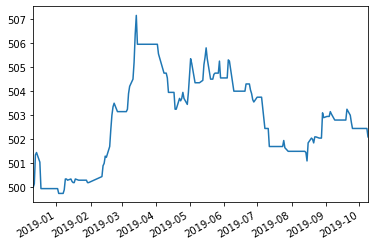

In [170]:
All['總資產'].plot()

In [167]:
All.to_csv('好樂迪.csv',encoding = 'utf_8_sig')